# Previsão do PIB brasileiro com técnica de Nowcasting
---
* O Nowcasting é uma abordagem moderna de monitorar as condições econômicas em tempo real. Diferentemente das técnicas de previsão tradicionais, o nowcasting está preocupado em prever os indicadores enqunto estamos dentro do período de referência, ou logo após. Não há interesse em previsões maior prazo.
* O método mais utilizado é o modelo de fator dinâmico, que condensa a informação de várias séries de dados em um pequeno número de fatores. 
* O filtro de Kalman gera projeções para todas as séries de dados e estimativas para cada lançamento. Quando há o anúncio de novos dados, há uma alteração no modelo, chamado de notícias.
* Nos últimos anos, modelos de machine learning, como SVM, LASSO, elastic net e redes neurais, foram implantados para melhorar o poder preditivo dos nowcastings.

## Objetivo
> O objetivo desta análise é fazer um Nowcasting do PIB trimestral brasileiro com base em mais de 30 variáveis. Para isso, utilizaremos o pacote nowcasting que permite a estimação de modelos de fatores dinâmicos. Assim, é possível obter novas estimativas do PIB a cada novo lançamento de variável. 

## Problema
* Quais variáveis escolher
* Coleta dos dados
* Tratamento e normalização dos dados 
* Correlação das variáveis
* Escolha do modelo
* Estimação, treino e acurácia
* Previsão 
* Comunicação dos resultados

### Pacotes
---

In [96]:
install.packages("sidrar")



  There is a binary version available but the source version is later:
       binary source needs_compilation
sidrar  0.2.5  0.2.6             FALSE



installing the source package 'sidrar'




In [38]:
devtools::install_github('wilsonfreitas/rbcb')


Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.




rlang    (0.4.10 -> 0.4.11) [CRAN]
ellipsis (0.3.1  -> 0.3.2 ) [CRAN]
vctrs    (0.3.7  -> 0.3.8 ) [CRAN]
utf8     (1.1.4  -> 1.2.2 ) [CRAN]
fansi    (0.4.0  -> 0.5.0 ) [CRAN]
cli      (2.5.0  -> 3.0.1 ) [CRAN]
pillar   (1.6.0  -> 1.6.2 ) [CRAN]
R6       (2.5.0  -> 2.5.1 ) [CRAN]
mime     (0.6    -> 0.11  ) [CRAN]
jsonlite (1.6    -> 1.7.2 ) [CRAN]
curl     (3.3    -> 4.3.2 ) [CRAN]
xml2     (1.2.0  -> 1.3.2 ) [CRAN]
tibble   (3.1.0  -> 3.1.3 ) [CRAN]


Installing 13 packages: rlang, ellipsis, vctrs, utf8, fansi, cli, pillar, R6, mime, jsonlite, curl, xml2, tibble




  There are binary versions available but the source versions are later:
       binary source needs_compilation
utf8    1.2.1  1.2.2              TRUE
fansi   0.4.2  0.5.0              TRUE
cli     2.5.0  3.0.1              TRUE
pillar  1.6.0  1.6.2             FALSE
R6      2.5.0  2.5.1             FALSE
mime     0.10   0.11              TRUE
curl    4.3.1  4.3.2              TRUE
tibble  3.1.1  3.1.3              TRUE

  Binaries will be installed


Warning message:
"package 'tibble' is in use and will not be installed"


package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'ellipsis' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ellipsis'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\ellipsis\libs\x64\ellipsis.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\ellipsis\libs\x64\ellipsis.dll: Permission denied"
Warning message:
"restored 'ellipsis'"


package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\vctrs\libs\x64\vctrs.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\vctrs\libs\x64\vctrs.dll: Permission denied"
Warning message:
"restored 'vctrs'"


package 'utf8' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'utf8'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\utf8\libs\x64\utf8.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\utf8\libs\x64\utf8.dll: Permission denied"
Warning message:
"restored 'utf8'"


package 'fansi' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'fansi'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\fansi\libs\x64\fansi.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\fansi\libs\x64\fansi.dll: Permission denied"
Warning message:
"restored 'fansi'"


package 'cli' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"
Warning message:
"restored 'jsonlite'"


package 'curl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'curl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\curl\libs\x64\curl.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\curl\libs\x64\curl.dll: Permission denied"
Warning message:
"restored 'curl'"


package 'xml2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xml2'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eduardo\anaconda3\Lib\R\library\00LOCK\xml2\libs\x64\xml2.dll to C:\Users\Eduardo\anaconda3\Lib\R\library\xml2\libs\x64\xml2.dll: Permission denied"
Warning message:
"restored 'xml2'"



The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpYFpHl4\downloaded_packages


installing the source packages 'pillar', 'R6'


Warning message in i.p(...):
"installation of package 'pillar' had non-zero exit status"

Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.



v  checking for file 'C:\Users\Eduardo\AppData\Local\Temp\RtmpYFpHl4\remotes21983aa11b1d\wilsonfreitas-rbcb-653a874/DESCRIPTION' (901ms)
-  preparing 'rbcb':
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  building 'rbcb_0.1.6.tar.gz'
   


In [97]:
library(tidyverse)
library(zoo)
library(fredr)
library(nowcasting)
library(Quandl)
#library(BETS)
library(lubridate)
library(sidrar)
library(gtrendsR)
library(ipeadatar)
#library(knitr)
library(rbcb)


In [131]:
fredr_set_key(Sys.getenv("key_fred"))
Quandl.api_key(Sys.getenv("key_quandl"))

## Extração dos dados
### Rendimento

In [3]:
rendimento = ipeadata("PNADC12_RRTH12") %>%
    select(date, value)
rendimento = as.ts(read.zoo(rendimento[,c(1,2)], FUN=as.yearmon))
rendimento

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,,,2375,2387,2379,2384,2396,2403,2400,2398,2395,2392
2013,2401,2418,2431,2437,2440,2461,2477,2493,2493,2500,2492,2473
2014,2470,2494,2520,2519,2517,2505,2501,2517,2525,2535,2519,2521
2015,2527,2521,2522,2515,2503,2509,2490,2478,2477,2466,2447,2436
2016,2443,2427,2446,2427,2436,2410,2413,2435,2431,2436,2440,2452
2017,2461,2467,2481,2470,2467,2458,2459,2456,2468,2475,2485,2484
2018,2494,2505,2505,2514,2514,2512,2503,2514,2504,2506,2509,2523
2019,2538,2547,2538,2526,2508,2506,2500,2510,2507,2527,2538,2532
2020,2538,2539,2559,2589,2632,2678,2714,2713,2714,2673,2639,2602
2021,2595,2573,2580,2549,2547,,,,,,,


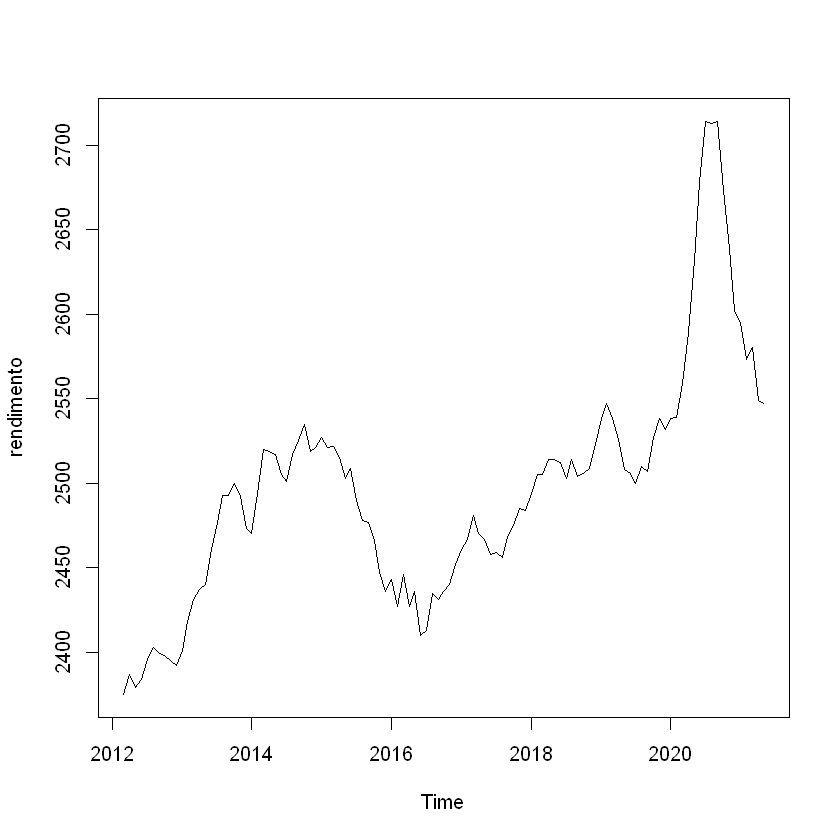

In [98]:
plot(rendimento)

### Força de trabalho

In [4]:
forca_trabalho = ipeadata("PNADC12_FT12") %>%
    select(date, value)


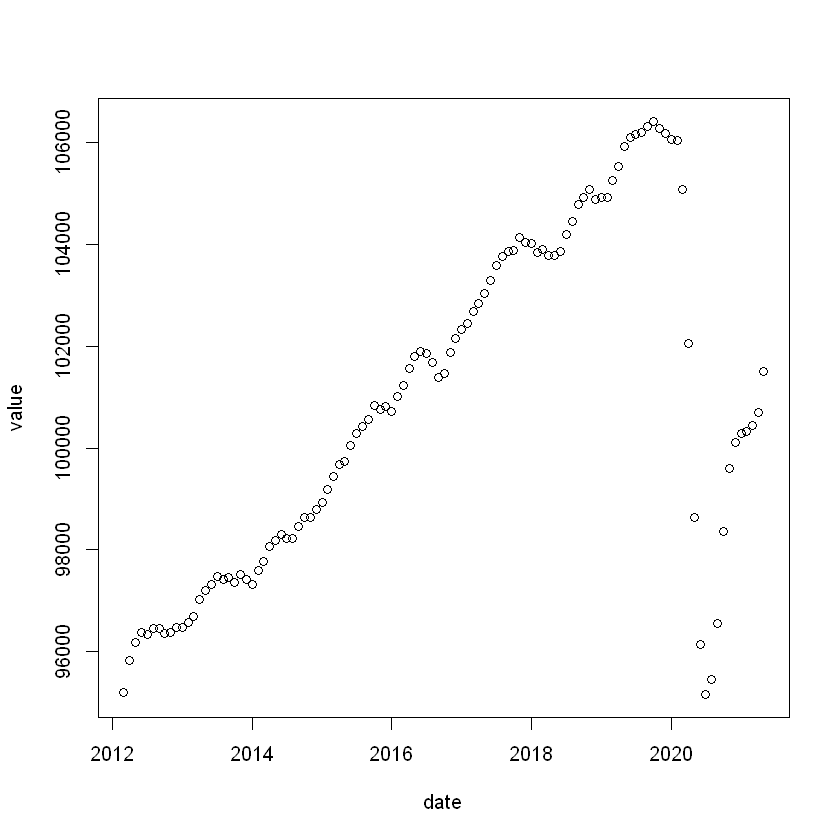

In [99]:
plot(forca_trabalho)

### CAGED

In [5]:
caged = ipeadata("CAGED12_SALDON12") %>%
    select(date, value)

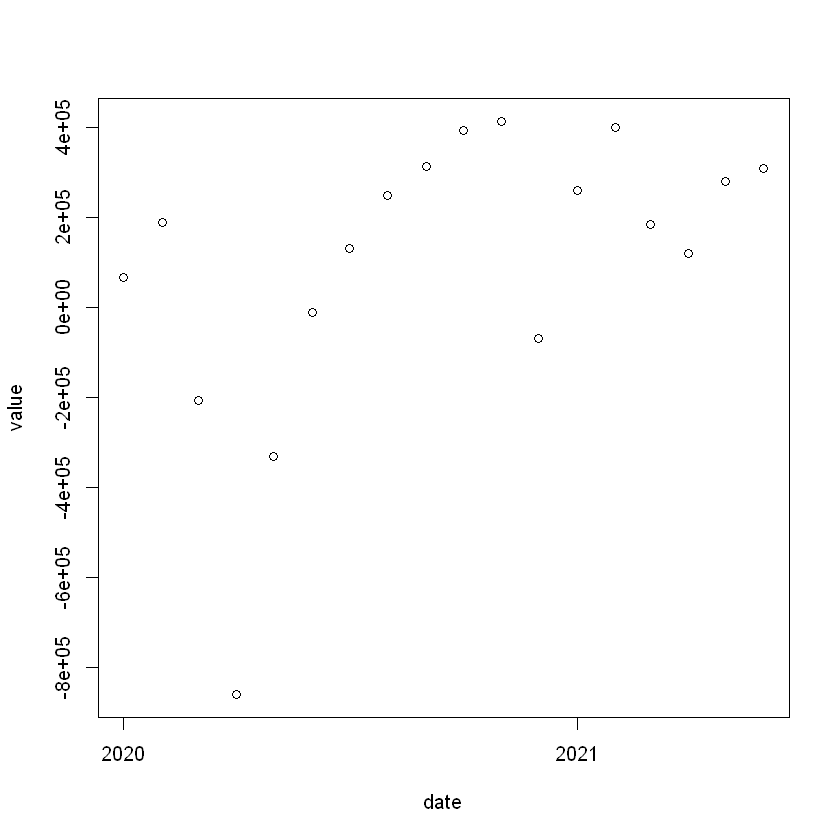

In [100]:
plot(caged)

### Seguro Desemprego
* Google Trends

In [6]:
seguro = gtrends(keyword = c("seguro desemprego"),
                geo = "BR", time='all', onlyInterest = TRUE)

seguro = seguro$interest_over_time %>%
   select(date, hits)

seguro = head(seguro, nrow(seguro) -1)
seguro = as.ts(read.zoo(seguro, FUN=as.yearmon))
seguro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,18,12,12,9,14,6,14,15,15,18,11,13
2005,15,14,11,12,15,17,19,11,16,8,10,12
2006,17,18,15,17,19,13,18,16,14,15,14,13
2007,16,17,21,20,17,20,20,20,17,16,16,13
2008,20,19,24,24,21,22,20,21,20,21,21,24
2009,31,43,36,35,38,36,37,30,29,30,26,25
2010,37,31,35,32,34,30,26,26,24,24,29,24
2011,31,29,31,29,29,30,28,28,32,29,27,29
2012,37,30,30,28,27,27,29,26,23,23,22,22
2013,32,26,27,27,26,24,27,24,24,27,24,22


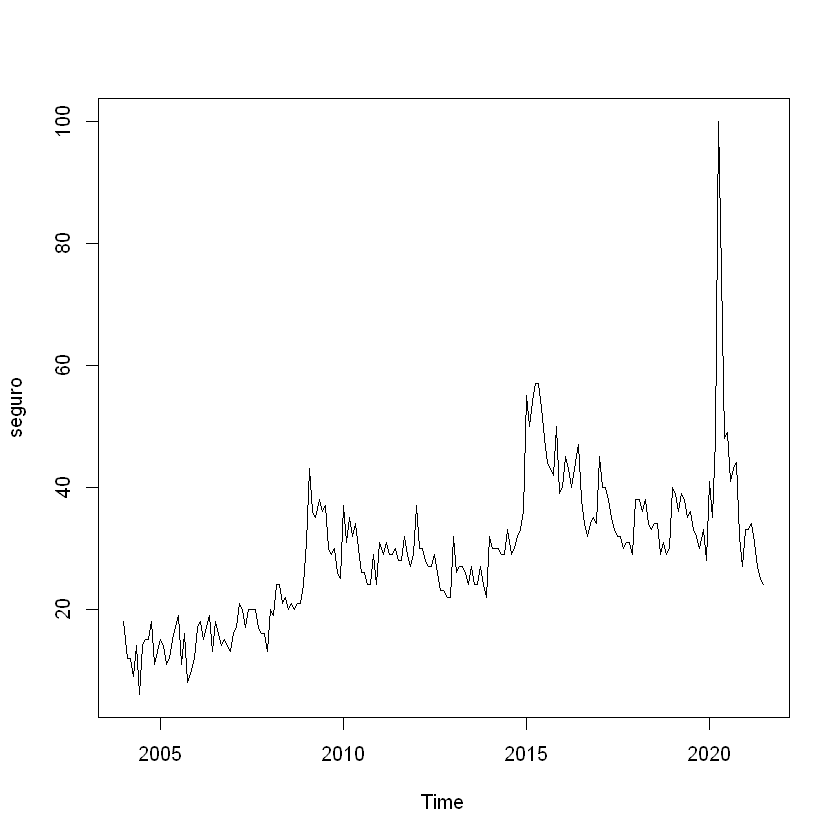

In [101]:
plot(seguro)

### Financial Data Directly

In [93]:
emergin_markets = Quandl("NASDAQOMX/NQEM")
emergin_markets$monthyear = paste0(year(emergin_markets$'Trade Date'), "-",
                                  month(emergin_markets$'Trade Date'))


In [82]:
emergin_markets = emergin_markets %>%
    group_by(monthyear)%>%
    dplyr::summarise(numMean = mean('Index Value', na.rm = T)) 
    as.data.frame()
emergin_markets

Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning me

Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning me

Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning me

Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning message in mean.default("Index Value", na.rm = T):
"argument is not numeric or logical: returning NA"
Warning me

ERROR: Error in as.data.frame(): argumento "x" ausente, sem padrão


In [94]:
emergin_markets = aggregate(emergin_markets[2], list(emergin_markets$monthyear), mean)
emergin_markets

Group.1,Index Value
<chr>,<dbl>
2001-10,239.1322
2001-11,265.5171
2001-12,292.3525
2001-3,305.2900
2001-4,298.3515
2001-5,311.0868
2001-6,304.8705
2001-7,279.6581
2001-8,278.0278


## Banco Central

In [41]:
bets = rbcb::get_series(c(economic_conditions = 4394,
                         house_index = 21340,
                         sales_vehicles = 1378,
                         sales_credit = 1453,
                         sales_retail = 1455), as='ts') %>%
    Reduce(ts.intersect,.)

In [44]:
colnames(bets) = c('economic_conditions', 'house_index', 'sales_vehicle', 'sales_credit', 'sales_retail')

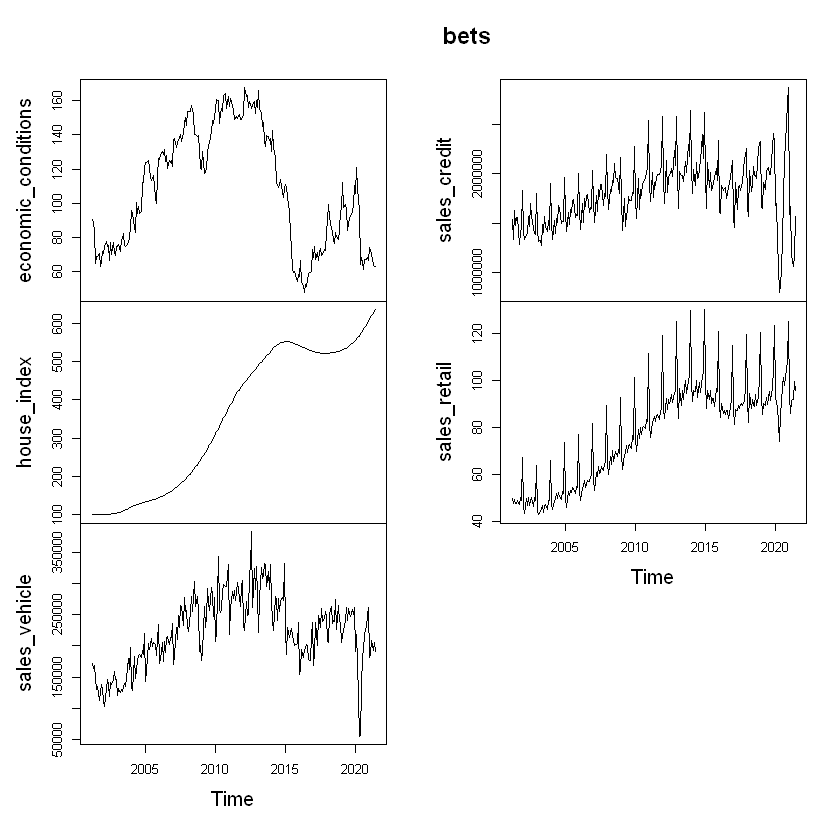

In [103]:
plot(bets)

### SIDRA

In [112]:
ind_prod = get_sidra(3653, variable = 4139, 
                     classific = 'c544', 
                     category=list(129314), 
                     period='all') %>%
    select("Mês (Código)", Valor) %>%
    separate("Mês (Código)", into = c('pre', 'post'), sep=-2) %>%
    mutate(date = paste0(pre, '-', post)) %>%
    select(-pre, -post)
    

In [113]:
ind_prod

,Valor,date
,<dbl>,<chr>
2,0.0,2002-01
3,3.2,2002-02
4,-0.5,2002-03
5,-0.3,2002-04
6,-0.5,2002-05
7,0.3,2002-06
8,0.5,2002-07
9,-1.5,2002-08
10,1.3,2002-09


In [115]:
ind_prod = as.ts(read.zoo(ind_prod[,c(2,1)], FUN=as.yearmon,
                         format="%Y-%m"))
ind_prod

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2002,0.0,3.2,-0.5,-0.3,-0.5,0.3,0.5,-1.5,1.3,0.8,0.1,-1.0
2003,0.4,-0.1,0.1,-0.4,-2.1,0.5,-1.0,1.6,3.3,0.5,1.2,-1.6
2004,1.7,1.6,0.6,0.7,0.9,0.2,0.7,1.0,0.7,-0.7,-0.2,1.1
2005,0.3,-1.5,0.9,0.1,3.4,-2.0,-0.7,0.2,-1.0,-0.7,1.1,2.0
2006,0.4,0.7,-0.7,0.7,0.9,-1.7,1.1,-0.2,-1.2,0.6,1.4,1.3
2007,-0.6,1.3,1.1,1.2,0.3,0.7,-0.5,1.6,-1.0,2.7,-1.1,0.4
2008,1.7,-0.4,0.3,-0.1,0.7,1.8,0.3,-1.3,1.4,-2.9,-5.9,-11.2
2009,2.1,2.3,0.5,1.2,1.3,1.3,1.3,1.4,1.6,2.0,1.6,0.1
2010,1.6,-0.2,2.5,0.1,-0.1,-0.6,-0.6,-0.4,0.2,-0.3,0.8,0.6
2011,0.1,1.4,0.6,-2.6,2.9,-2.2,0.3,-0.9,-2.1,-0.9,0.8,2.4


### FEED


In [132]:
exchangerate = fredr_series_observations(series_id="RBBRBIS")
exchangerate = as.ts(read.zoo(exchangerate[,c(1,3)], FUN=as.yearmon))

ERROR: Error: FRED API key must be set. See `?fredr_set_key`.


In [127]:
### Juntando os dados
base = ts.union(rendimento,seguro, bets, ind_prod)

In [129]:
base = window(base, start=c(2000,1), frequency=12)

Warning message in window.default(x, ...):
"'start' value not changed"


In [130]:
return(base)

,rendimento,seguro,bets.economic_conditions,bets.house_index,bets.sales_vehicle,bets.sales_credit,bets.sales_retail,ind_prod
Mar 2001,NA,NA,90.60,100.00,172148,1537852,49.7,NA
Apr 2001,NA,NA,88.88,100.08,163458,1335403,47.6,NA
May 2001,NA,NA,83.55,100.15,168929,1632795,49.4,NA
Jun 2001,NA,NA,64.82,100.22,147406,1477408,47.5,NA
Jul 2001,NA,NA,68.72,100.29,130769,1557517,47.8,NA
Aug 2001,NA,NA,68.80,100.36,134288,1558607,49.1,NA
Sep 2001,NA,NA,70.18,100.43,112727,1291428,47.1,NA
Oct 2001,NA,NA,62.66,100.49,125537,1419503,50.0,NA
Nov 2001,NA,NA,65.50,100.56,137434,1449857,49.1,NA
Dec 2001,NA,NA,71.36,100.64,131611,1829871,67.4,NA


## Modelo: Estimando o NowCasting

In [ ]:
delay = c(60,60,30,1,7,1,14,60,14,14,14,8,21,9,1,14,14,14,24,24,14,31,28,14,14,9,31,8,9,34,45,23,75,60)
base_RT = PRTDB(mts=base, delay=delay)
